# Mapeando el Universo



## Análisis y Visualización

 En este primer trabajo comenzaremos a explorar los datos, para ello se propone responder las siguientes consignas:
 
**1 - Análisis general**
 
 * Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 
**2 - Análisis estadístico**
 
 * Es la distribución de galaxia uniforme sobre la bóveda celeste?
 * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.
 * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?
 * Cuál es la distribución del corrimiento al rojo de las galaxias?
 * Existe correlación entre las diferentes variables?
 * Realicen gráficos boxplot para identificar outliers.
 * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?
 * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.
 * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

### Lectura de datos

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)


In [4]:
filename = "dataset/dataset_short.csv"

In [5]:
df = pd.read_csv(filename,index_col=0)

In [6]:
df.index.max()

3341830154740590592

In [7]:
df.shape

(5000, 115)

In [8]:
df.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,88.794310,87.360266,88.887199,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,57.854492,56.442004,56.147341,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-83.074030,-90.508710,-90.101060,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,43.378330,44.293123,46.491595,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,88.246740,86.045460,89.176195,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,134.898150,130.424700,131.439100,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604300,240.368900,255.055200,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440


### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente ha votado si se corresponde con una galaxia espiral, elíptica o irregular.

In [9]:
filename = 'dataset/dataset_short_zoo.csv'

In [10]:
zoo = pd.read_csv(filename,index_col=0)

In [11]:
zoo[:5]

,spiral,elliptical,uncertain
specobjid,,,
2102060129527556096,0,0,1
2006529611202062336,0,0,1
2489490101873174528,1,0,0
453783048702420992,0,0,1
2665066165524523008,0,0,1


In [12]:
data = df.join(zoo)

In [13]:
data.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454,0.28880,0.099800,0.611400
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687,0.45325,0.299763,0.487481
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578,0.00000,0.000000,0.000000
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518,0.00000,0.000000,0.000000
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355,0.00000,0.000000,1.000000
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167,1.00000,0.000000,1.000000
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440,1.00000,1.000000,1.000000


# **Resolución Punto 1 - Análisis general**
 
 * Descripción del conjunto de datos (cantidad de variables, qué representa cada una, tipo, etc.)
 * ¿cuáles creen que serían las variables más importantes a considerar?

In [14]:
data.shape

(5000, 118)

In [15]:
np.asarray([list(data.columns)])

array([['z', 'zErr', 'zWarning', 'subClass', 'velDisp', 'velDispErr',
        'ra', 'dec', 'raErr', 'decErr', 'modelMag_u', 'modelMag_g',
        'modelMag_r', 'modelMag_i', 'modelMag_z', 'modelMagErr_u',
        'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
        'modelMagErr_z', 'petroMag_u', 'petroMag_g', 'petroMag_r',
        'petroMag_i', 'petroMag_z', 'petroMagErr_u', 'petroMagErr_g',
        'petroMagErr_r', 'petroMagErr_i', 'petroMagErr_z', 'petroRad_u',
        'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
        'petroRadErr_u', 'petroRadErr_g', 'petroRadErr_r',
        'petroRadErr_i', 'petroRadErr_z', 'petroR50_u', 'petroR50_g',
        'petroR50_r', 'petroR50_i', 'petroR50_z', 'petroR50Err_u',
        'petroR50Err_g', 'petroR50Err_r', 'petroR50Err_i',
        'petroR50Err_z', 'petroR90_u', 'petroR90_g', 'petroR90_r',
        'petroR90_i', 'petroR90_z', 'petroR90Err_u', 'petroR90Err_g',
        'petroR90Err_r', 'petroR90Err_i', 'petroR90Err_z', 'deVRad_u',

In [16]:
data.dtypes

z                float64
zErr             float64
zWarning           int64
subClass          object
velDisp          float64
velDispErr       float64
ra               float64
dec              float64
raErr            float64
decErr           float64
modelMag_u       float64
modelMag_g       float64
modelMag_r       float64
modelMag_i       float64
modelMag_z       float64
modelMagErr_u    float64
modelMagErr_g    float64
modelMagErr_r    float64
modelMagErr_i    float64
modelMagErr_z    float64
petroMag_u       float64
petroMag_g       float64
petroMag_r       float64
petroMag_i       float64
petroMag_z       float64
petroMagErr_u    float64
petroMagErr_g    float64
petroMagErr_r    float64
petroMagErr_i    float64
petroMagErr_z    float64
                  ...   
expRad_i         float64
expRad_z         float64
expRadErr_u      float64
expRadErr_g      float64
expRadErr_r      float64
expRadErr_i      float64
expRadErr_z      float64
expAB_u          float64
expAB_g          float64


**NOTAS:**    
**a)** Contamos con 117 variables iniciales.  

**b)** Las variables son de tipo numéricas (float64, int64) excepto la varibale **subclass** que es de tipo objet (string).   

**c)** Las variables más importantes a considerar en este estudio serían las **magnitudes** de las galaxias, en las distintas bandas fotométricas, así como la **posicion angular** en el cielo de las mismas y el **redshift** obtenido a partir de la espectroscopia.   

**d)** Las magnitudes en los distintos filtros fotométricos (u, g, r, i, z) se calculan mediante diferentes métodos ó modelos:     
**d)** El brillo se mide en magnitudes teniendo en cuenta 5 bandas (u, g, r, i, z) y se puede calcular mediante diferentes métodos ó modelos:     
* Las magnitudes **ModelMag** para las 5 bandas fotometricas (*u, g, r, i, z*), se corresponden con aquellas obtenidas a partir del modelo (*Vaucouleurs o exponencial*) que mejor ajusta el flujo de la galaxia en la *banda r*. Este mismo modelo, y sus parámetros, son utilizados para obtener las megnitudes en el resto de las bandas fotometricas. Esto permite que los colores no esten sesgados.    
* Las magnitudes **petroMag_** para las 5 bandas fotometricas (u, g, r, i, z) siguen otro modelo de ajuste para el brillo de una galaxia, utilizando distintos radios para estos ajustes. Por ejemplo: **petroRad**: se corresponde al radio petrosiano utilizado para obtener las magnitudes petroMag. 

**e)** Información de las variables:
* Las variables **z** y **zErr**, corresponden al *redshift* y su *error*.    
* La variable **zWarning** son *flags* (enteros) que indican si hubieron problemas en el proceso de ajuste para la obtencion del *redshift*. Con el valor 0 y 16 se indica que no hubo problemas.    
* La variable **subClass** indica  una sub-clasificación de las galaxias a partir de la informacion en las lineas de emisión de sus espectros. Los valores posibles que puede tomar esta variable son: 'AGN', 'STARFORMING', 'STARBURST', 'BROADLINE', or NaN.   
* La variable **velDisp** y **velDispErr** indica la *velocidad de disperción* (km/s) de las galaxias y su error. Los valores posibles que toma esta variable, son floats positivos.     
* Las variables **ra**, **dec**, **raErr** y **decErr** son las *coordenadas ecuatoriales* en el sistema J2000 en grados decimales y sus errores.     
* Las variables ubicadas a partir de la columna número 10 hasta la columna número 108, contienen información sobre las magnitudes en las diferentes *bandas fotométricas* y los distintos parámetros utilizados, correspondientes a cada modelo, para el cálculo de las mismas.
* Las variables a partir de la columna 109 se corresponden con los parámentros utilizados para calcular los distintos modelos (*Vaucouleurs, Exponencial*); por ejemplo: 
* * **rdeV** y **rExp**: radio efectivo para los distintos modelos,    
* * **abDeV** y **abExp**: relación de ejes para el modelo con mejor ajuste,     
* * **phiDeV** y **phiExp**, etc.   
* Las variables que comienzan con **extinction_** se corresponden a las correcciones en magnitud por extinción galáctica para las 5 bandas fotometricas. El mapa de extinción utilizado es el de *Schlegel et al. 1998*.     
* Las variables **spiral**, **elliptical** y **uncertain** se corresponden a la clasificacion de galaxias obtenidas a partir del relevamiento Zoo. Los valores posibles son 0 y 1 (False=0, True=1).    
* La variable **intervals ...** y **z_segment** se corresponden con intervalos en *redshift*. Estas variables solo se crearon para discretizar los valores para poder realizar gráficos.

# 2 **Resolución 2 - Análisis estadístico**
 
## 2.1) Distribución de las galaxias  sobre la bóveda celeste

Text(0.5,1,'Distribución de galaxias sobre la bóveda celeste')

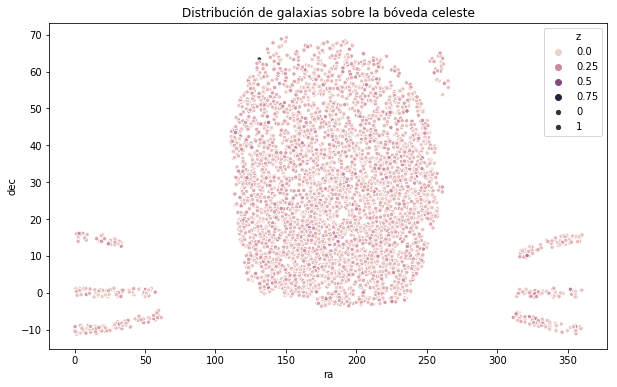

In [17]:
f = plt.figure(figsize=(10,6))
ax = f.add_subplot(111)

seaborn.scatterplot(x='ra',y='dec',data=df,hue='z',size=1,ax=ax)
plt.title('Distribución de galaxias sobre la bóveda celeste')

***Otra forma de representar de la posicion de las galaxias en la boveda celeste:***

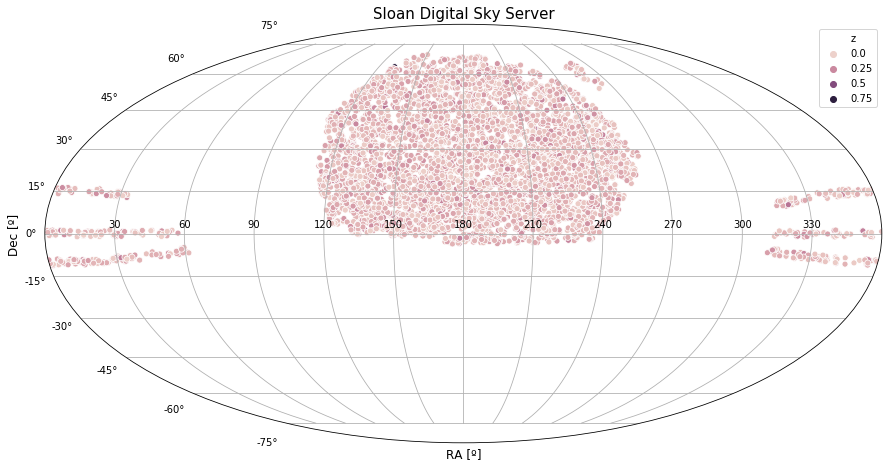

In [18]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111,projection="mollweide")

seaborn.scatterplot(x=np.radians(df['ra'])-np.pi,y=np.radians(df['dec']),data=df,hue='z',ax=ax)
plt.grid(True)

ax.set_title('Sloan Digital Sky Server')
ax.title.set_fontsize(15)
ax.set_xlabel("RA [º]")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("Dec [º]")
ax.yaxis.label.set_fontsize(12)
tick_labels = np.array([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150])
ax.set_xticklabels(tick_labels+180)
plt.show()

**NOTAS:**     
**a)** En este gráfico podemos observar la posición angular de las galaxias sobre el cielo, en el sistema de coordenadas ecuatorial. Se puede apreciar que dicha distribución no es homogénea, cubriendo distintas áreas del cielo y mayormente el hemisferio norte.     

**b)** A su vez sobre el mismo grafico se representa el redshift de las galaxias a través de los distintos colores. Sobre esta información se puede observar que pareciera que el redshift de las galaxias se distribuye de forma homogénea dentro de las distintas áreas cubiertas del cielo.      

## 2.2) Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.

In [19]:
# Tomamos una rebanada sobre el plano celeste

slice_dec = [30,40]
dataset_cut = data
dataset_cut['intervals'] = pd.cut(data['dec'],slice_dec)
dataset_sliced = dataset_cut[dataset_cut['intervals'] == pd.Interval(slice_dec[0],slice_dec[1])]

Text(0.5,1,'Distribución del redshift(z) de las galaxias')

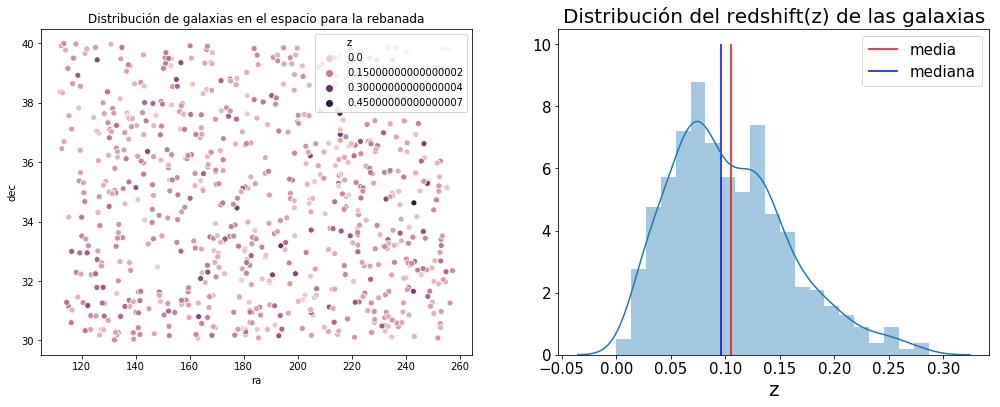

In [20]:
# Realizamos el gráfico para ver como se distribuyen las galaxias utilizando la rebanada calculada anteriormente

plt.figure (figsize=(17,6))

plt.subplot(121)
plt1=seaborn.scatterplot(data=dataset_sliced,x='ra',y='dec',hue='z') #,size=1,ax=ax
plt.title('Distribución de galaxias en el espacio para la rebanada')

plt.subplot(122)
range = [0.0,0.3]
seaborn.distplot(dataset_sliced['z'],kde_kws={'clip':range},hist_kws={'range':range})
plt.vlines(dataset_sliced['z'].mean(),0.0,10.0,'r',label='media')
plt.vlines(dataset_sliced['z'].median(),0.0,10.0,'b',label='mediana')
plt.legend(fontsize=15)
plt.xlabel(r"Redshift z", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel(r"z", fontsize=20)
plt.title('Distribución del redshift(z) de las galaxias', fontsize=20)

**NOTAS:**    
**a)** En el primer gráfico observamos la distribución espacial de galaxias obtenida para la rebanada, clasificadas según su **redshift**.    

**b)** En el segundo gráfico podemos observar que las galaxias de la rebanada (según el **redshift**) siguen una distribución con asimetría positiva similar a una Poisson. Esto nos habla de que la información que tenemos de la mayoría de galaxias se encuentran en distancias medias. Contamos con poca información (número de galaxias) de las galaxias más cercanas debido a las limitaciones del sistema de detección. Y también contamos con poca información de las galaxias mas lejanas debido al límite de detección del telescopio.

**Otra forma de apreciar la distribución de las galaxias de la rebanada según el redshift, teniendo en cuenta las coordenadas polares.**

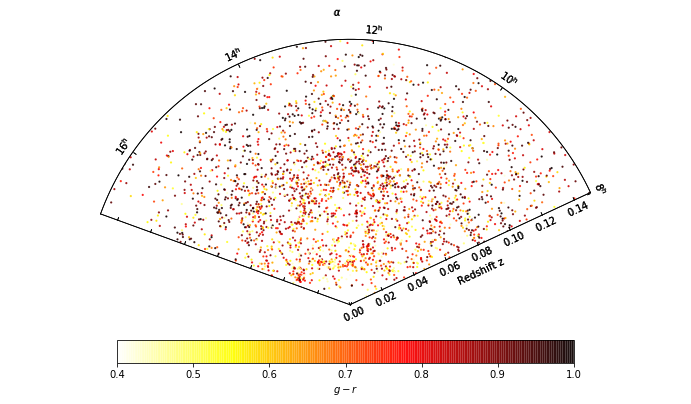

In [21]:
df['modelColor_gr']=df['modelMag_g']-df['modelMag_r']

def setup_axes(fig, zmin, zmax, rahmin, rahmax):
    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(-95, 0)

    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180., 1.)

    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorHMS(4)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = MaxNLocator(8)

    ra0, ra1 = rahmin*15, rahmax*15
    z0, z1 = zmin, zmax
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, z0, z1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig,111, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")

    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")

    ax1.axis["left"].label.set_text(r"Redshift z")
    ax1.axis["top"].label.set_text(r"$\alpha$")

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax

fig = plt.figure(figsize=(12, 6))
ax, aux_ax = setup_axes(fig, 0, 0.15, 8, 17)

indx = (df['z'] < 0.3) & (df['modelColor_gr'] > 0.4) & (df['modelColor_gr'] < 1.0)

radius = df['z'][indx]
theta = df['ra'][indx]
colors = df['modelColor_gr'][indx]

img=aux_ax.scatter(theta, radius,s=1.5, c=colors, cmap='hot_r', alpha=0.75)
plt.colorbar(img,fraction=0.07, pad=0.1,orientation='horizontal', label=r"$g-r$")
img.set_clim(vmin=0.4, vmax=1)
plt.show()

 ## *2.3) Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?

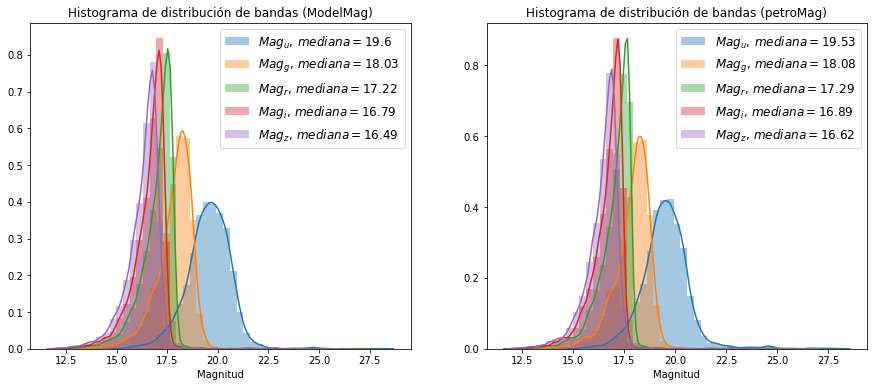

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(121)
rmin=min(min(df['modelMag_g']),min(df['modelMag_r']),min(df['modelMag_i']),min(df['modelMag_u']),min(df['modelMag_z']))
rmax=max(max(df['modelMag_g']),max(df['modelMag_r']),max(df['modelMag_i']),max(df['modelMag_u']),max(df['modelMag_z']))

range=[rmin, rmax]
#range = [df['modelMag_r'].min()-1,df['modelMag_r'].max()-1]
seaborn.distplot(df['modelMag_u'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_u,\,mediana=$"+str(np.round(df['modelMag_u'].median(),2)))
seaborn.distplot(df['modelMag_g'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_g,\,mediana=$"+str(np.round(df['modelMag_g'].median(),2)))
seaborn.distplot(df['modelMag_r'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_r,\,mediana=$"+str(np.round(df['modelMag_r'].median(),2)))
seaborn.distplot(df['modelMag_i'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_i,\,mediana=$"+str(np.round(df['modelMag_i'].median(),2)))
seaborn.distplot(df['modelMag_z'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_z,\,mediana=$"+str(np.round(df['modelMag_z'].median(),2)))
plt.title('Histograma de distribución de bandas (ModelMag)')
plt.xlabel('Magnitud')

plt.legend(fontsize=12)

plt.subplot(122)
rmin=min(min(df['petroMag_g']),min(df['petroMag_r']),min(df['petroMag_i']),min(df['petroMag_u']),min(df['petroMag_z']))
rmax=max(max(df['petroMag_g']),max(df['petroMag_r']),max(df['petroMag_i']),max(df['petroMag_u']),max(df['petroMag_z']))
seaborn.distplot(df['petroMag_u'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_u,\,mediana=$"+str(np.round(df['petroMag_u'].median(),2)))
seaborn.distplot(df['petroMag_g'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_g,\,mediana=$"+str(np.round(df['petroMag_g'].median(),2)))
seaborn.distplot(df['petroMag_r'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_r,\,mediana=$"+str(np.round(df['petroMag_r'].median(),2)))
seaborn.distplot(df['petroMag_i'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_i,\,mediana=$"+str(np.round(df['petroMag_i'].median(),2)))
seaborn.distplot(df['petroMag_z'],kde_kws={'clip':range},hist_kws={'range':range}, label=r"$Mag_z,\,mediana=$"+str(np.round(df['petroMag_z'].median(),2)))
plt.title('Histograma de distribución de bandas (petroMag)')
plt.xlabel('Magnitud')
plt.legend(fontsize=12)

**NOTAS:**     
**a)** Las distribuciones de las magnitudes en las diferentes bandas parecen ajustarse a una distribucion gausiana, sin embargo se puede apreciar que hay una cola (asimetría) hacia magnitudes mas brillantes (valores mas chicos en magnitud). Este comportamiento se observa tanto en las magnitudes **petroMag** como las **modelMag**.

**b)** Observamos que la distribución de las magnitudes en las diferentes bandas para cada uno de los métodos, son similares (ver los valores de la mediana para cada banda fotometrica asociadas a cada método sobre las graficas).


 ## 2.4) Cuál es la distribución del corrimiento al rojo de las galaxias?

Text(0.5,1,'Distribución de galaxias de la rebanada según el redshift')

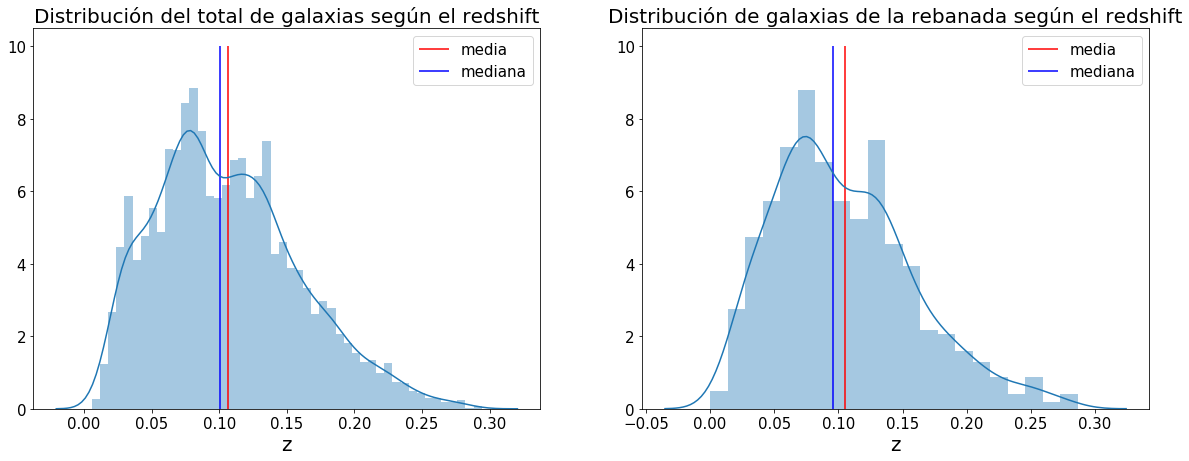

In [23]:
# Obtenemos la distribución de las galaxias teniendo en cuenta el corrimiento al rojo (redshift) como distancia

# Distribucuón del conjunto total de galaxias segun el redshift

plt.figure(figsize=(20,7))

plt.subplot(121)
range = [0.0,0.3]
seaborn.distplot(df['z'],kde_kws={'clip':range},hist_kws={'range':range})
plt.vlines(df['z'].mean(),0.0,10.0,'r',label='media')
plt.vlines(df['z'].median(),0.0,10.0,'b',label='mediana')
plt.legend(fontsize=15)
plt.xlabel(r"Redshift z", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel(r"z", fontsize=20)
plt.title('Distribución del total de galaxias según el redshift', fontsize=20)

# Distribucuón de las galaxias de la rebanada segun el redshift
plt.subplot(122)
range = [0.0,0.3]
seaborn.distplot(dataset_sliced['z'],kde_kws={'clip':range},hist_kws={'range':range})
plt.vlines(dataset_sliced['z'].mean(),0.0,10.0,'r',label='media')
plt.vlines(dataset_sliced['z'].median(),0.0,10.0,'b',label='mediana')
plt.legend(fontsize=15)
plt.xlabel(r"Redshift z", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel(r"z", fontsize=20)
plt.title('Distribución de galaxias de la rebanada según el redshift', fontsize=20)

**NOTA**      
**a)** Podemos observar que las galaxias según el **redshift** siguen una distribución con asimetría positiva similar a una Poisson, tanto para el conjunto total de galaxias como para la rebanada que habiamos calculado anteriormente. Esto nos habla de que tenemos menos información de galaxias a medida que están más lejanas. Por limitaciones del sistema de detección, las galaxias muy cercanas no son detectadas.

 ## 2.5) Existe correlación entre las diferentes variables?

In [24]:
data['modelColor_ug'] = data['modelMag_u'] - data['modelMag_g']
data['modelColor_gr'] = data['modelMag_g'] - data['modelMag_r']
data['modelColor_ri'] = data['modelMag_r'] - data['modelMag_i']
data['modelColor_iz'] = data['modelMag_i'] - data['modelMag_z']
data['petroColor_ug'] = data['petroMag_u'] - data['petroMag_g']
data['petroColor_gr'] = data['petroMag_g'] - data['petroMag_r']
data['petroColor_ri'] = data['petroMag_r'] - data['petroMag_i']
data['petroColor_iz'] = data['petroMag_i'] - data['petroMag_z']

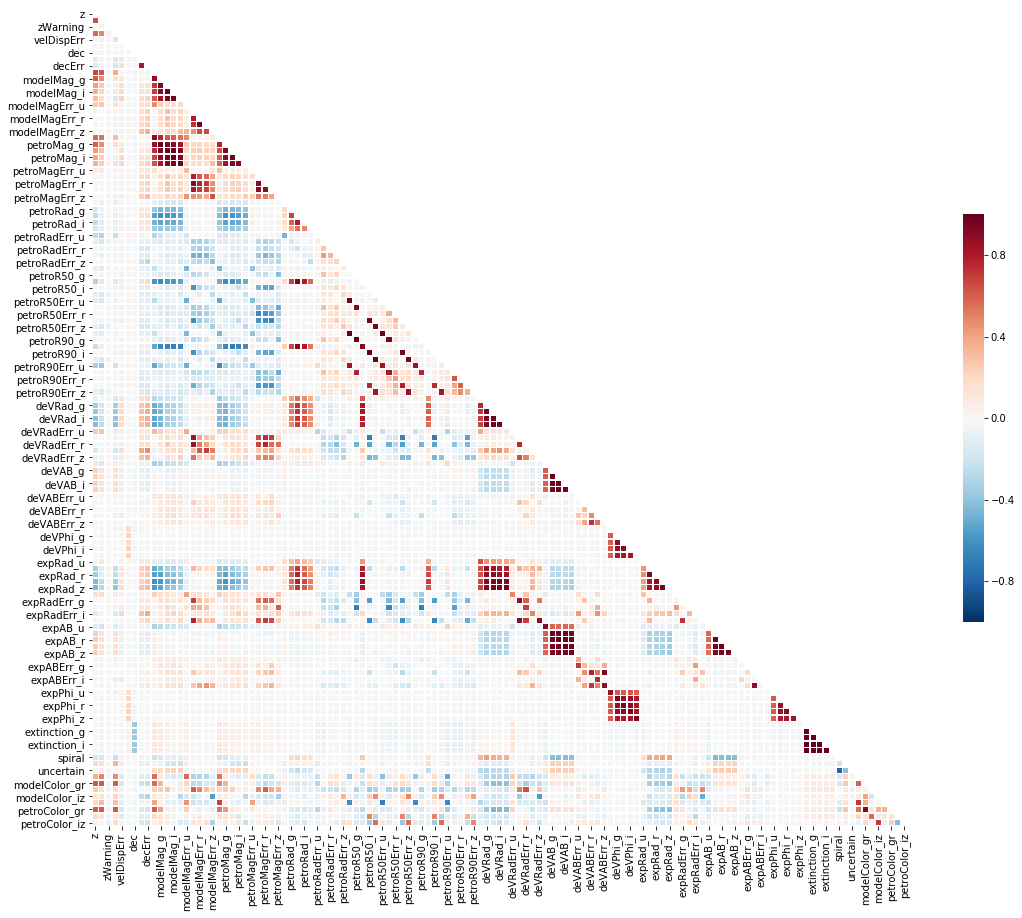

In [25]:
# Generamos la matriz de correlación
# De ser distribuciones normales podríamos usar el Coeficiente de Pearson para calcular la correlación.

corr = data.corr()

# Generamos la máscara para el triángulo superior 
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Seteamos el tipo de figura de matplotlib 
f, ax = plt.subplots(figsize=(20, 15))

# Dibujamos el heatmap con la máscara creada con una paleta de color divergente
seaborn.heatmap(corr, mask=mask, cmap='RdBu_r', vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**NOTAS:**    
**a)** Los cuadrados **azules** nos muestran una **correlación negativa** entre el par de variables que lo genera.   

**b)** Los cuadrados **rojoss** nos muestran una **correlación positiva** entre el par de variables que lo genera.    

**c)** Los pares de variables que generan cuadraros **blancos** no están correlacionadas.   

**d)** Las bandas (u, r, g, i, z) y sus errores calculados con el método **ModelMag** tienen una **correlación positiva** con las calculadas con el método **PetroMag**.    

**e)** El **redshift** muestra una **correlación positiva** con las bandas (u, r,g, i, z) ya sean del método **ModelMag** ó **PetroMag**.  
 
**f)** Las variables **expRad...**  tienen una correlación positiva con las variables **petroRad**.              

**g)** Otro grupo de variables correlacionadas positivamente son las **expAB...**  con las **deVAB**.   

 ## 2.6) Realicen gráficos boxplot para identificar outliers.

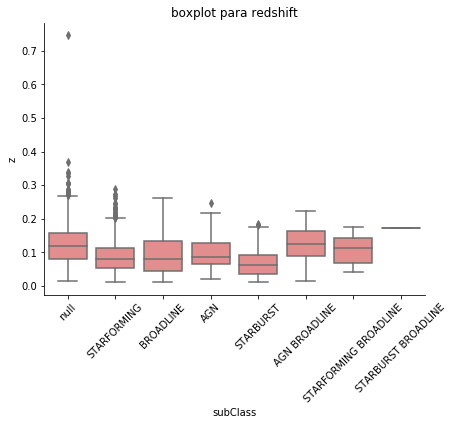

In [26]:
# Gráfico boxplot para redshift

plt.figure (figsize=(15,5))

plt.subplot(121)
plt1=seaborn.boxplot(data=data, color='lightcoral', x='subClass', y='z')
plt.title('boxplot para redshift')
plt.ylabel('z')
plt.xlabel('subClass')
plt.xticks(rotation=45)
seaborn.despine()

**NOTAS:**    
**a)** Las subclases con mayor cantidad de outliers son: **null** y **starforming**.

**b)** En menor medida, las subclases **AGN** y **starburst** poseen algunos outliers.

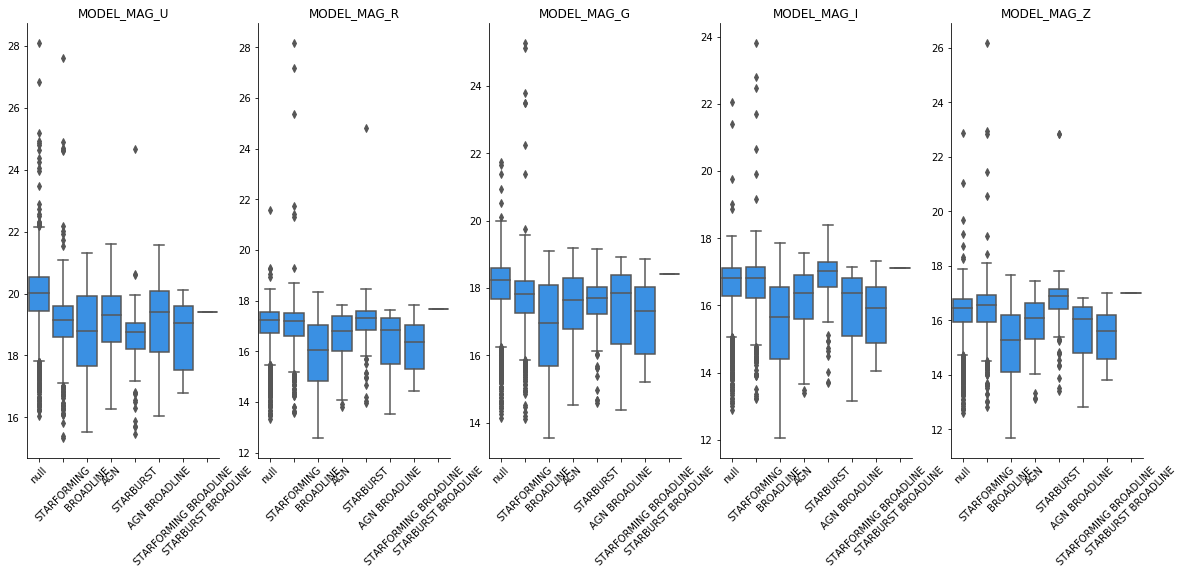

In [27]:
# Gráficos boxplot para las magnitudes modelMag (u, r, g, i, z)

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_u')
plt.title('MODEL_MAG_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_r')
plt.title('MODEL_MAG_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_g')
plt.title('MODEL_MAG_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_i')
plt.title('MODEL_MAG_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_z')
plt.title('MODEL_MAG_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTA:**    
**a)** Las subclases con mayor cantidad de outliers son: **null**, **starforming** y **starburst** para todas las bandas calculadas con el método **modelMag**.

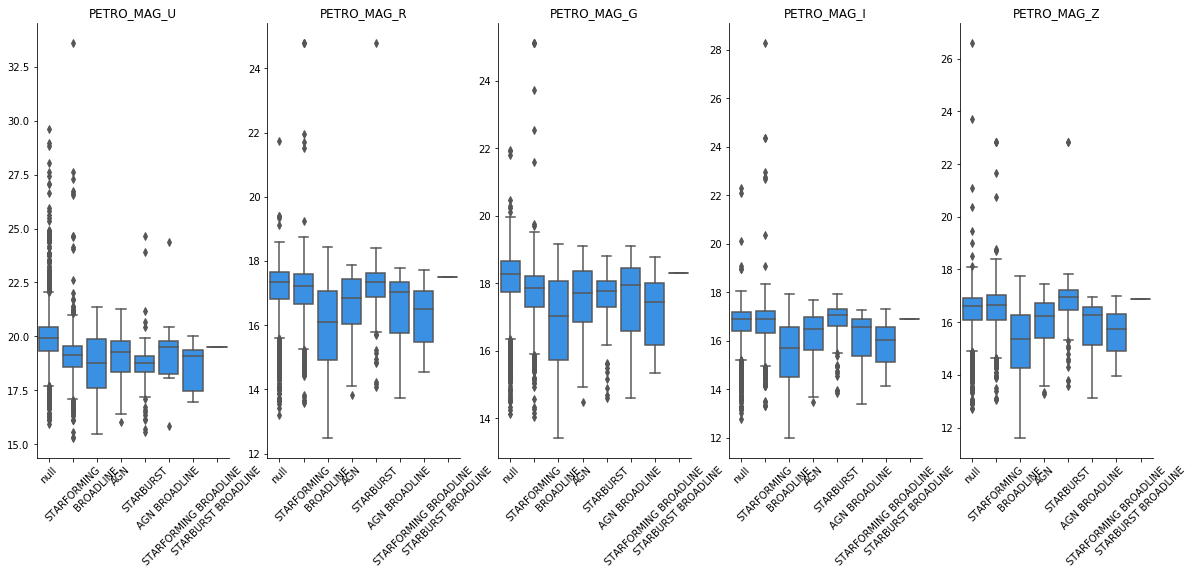

In [28]:
# Gráficos boxplot para las magnitudes petroMag (u, r, g, i, z)

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_u')
plt.title('PETRO_MAG_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_r')
plt.title('PETRO_MAG_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_g')
plt.title('PETRO_MAG_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_i')
plt.title('PETRO_MAG_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_z')
plt.title('PETRO_MAG_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTAS:**      
**a)** Las subclases con mayor cantidad de outliers son: **null**, **starforming** y **starburst** para todas las bandas calculadas con el método **petroMag**.   

**b)** Estos resultados se corresponden con los obtenidos para las bandas del método **modelMag**.

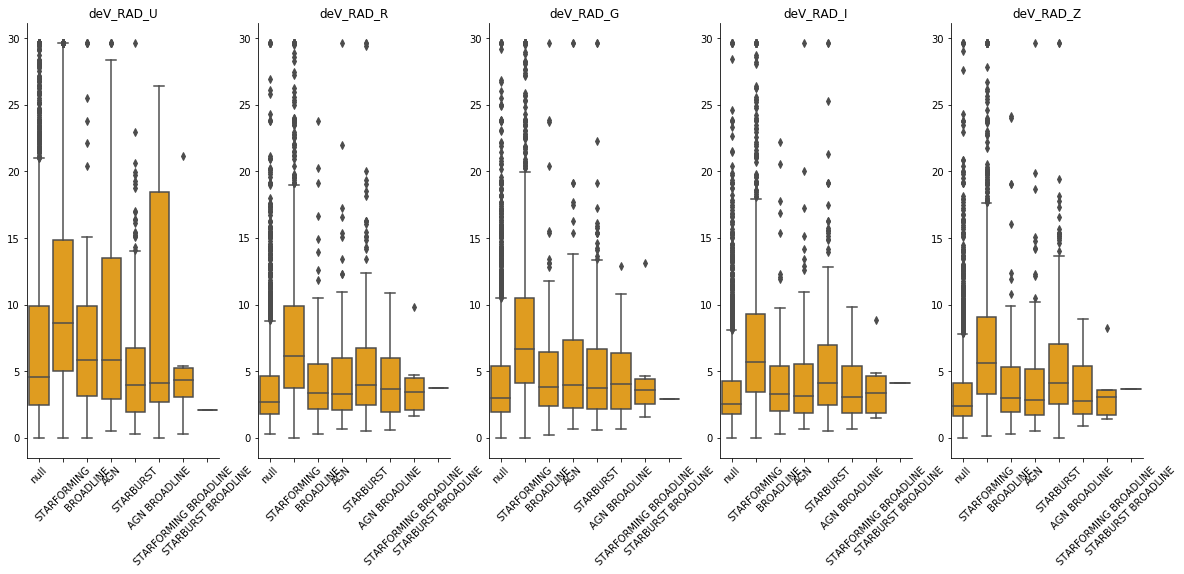

In [29]:
# Gráficos boxplot para los radios de Vaucouleurs

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='orange', x='subClass', y='deVRad_u')
plt.title('deV_RAD_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='orange', x='subClass', y='deVRad_r')
plt.title('deV_RAD_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='orange', x='subClass', y='deVRad_g')
plt.title('deV_RAD_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='orange', x='subClass', y='deVRad_i')
plt.title('deV_RAD_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='orange', x='subClass', y='deVRad_z')
plt.title('deV_RAD_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTA:**      
**a)** Todas las subclases poseen outliers para la variable **deVRAD** en las diferentes bandas (u, r, g, i, z).   

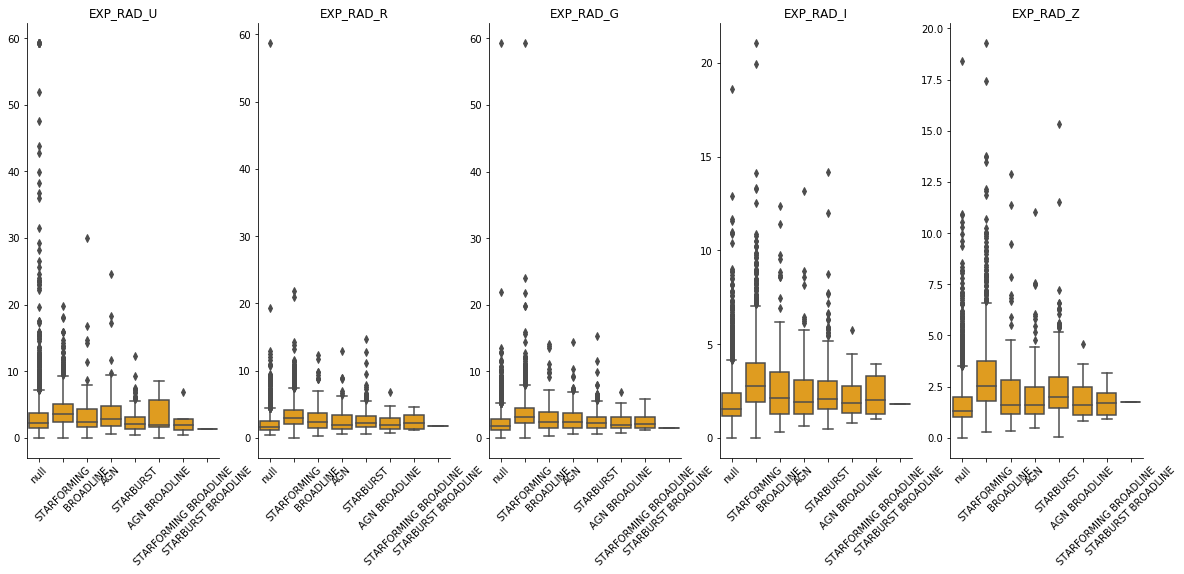

In [30]:
# Gráficos boxplot para los radios exponenciales

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='orange', x='subClass', y='expRad_u')
plt.title('EXP_RAD_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='orange', x='subClass', y='expRad_r')
plt.title('EXP_RAD_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='orange', x='subClass', y='expRad_g')
plt.title('EXP_RAD_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='orange', x='subClass', y='expRad_i')
plt.title('EXP_RAD_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='orange', x='subClass', y='expRad_z')
plt.title('EXP_RAD_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTA:**      
**a)** Todas las subclases a excepción de las subclases **starforming broadline** y **starburst broadline** poseen outliers para la variable **expRad** en las diferentes bandas (u, r, g, i, z). 

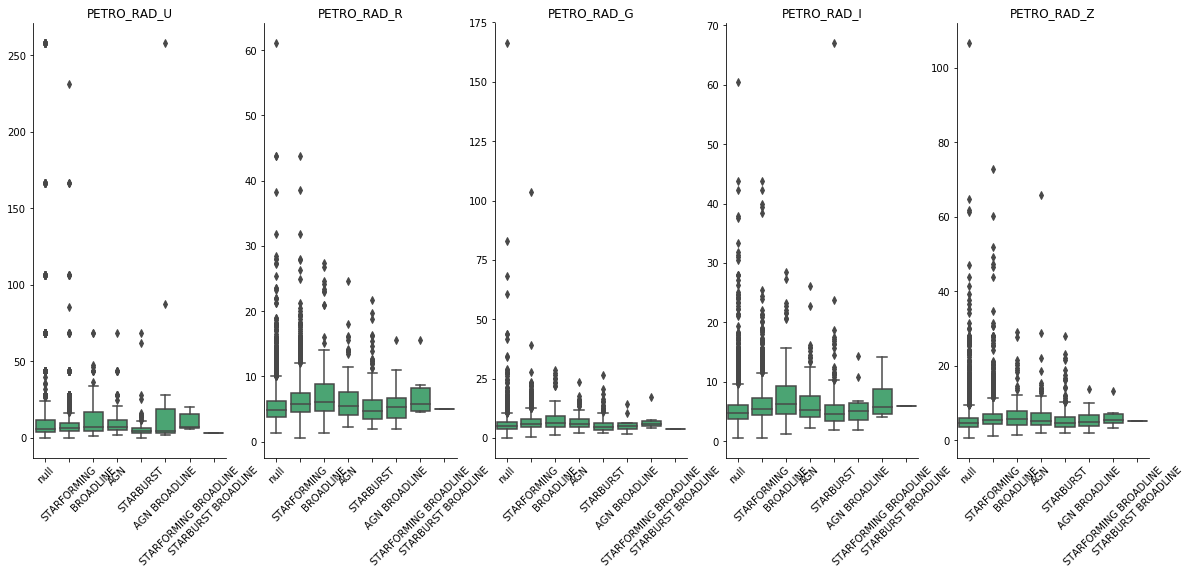

In [31]:
# Gráficos boxplot para los radios petrosianos (petroRad)

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_u')
plt.title('PETRO_RAD_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_r')
plt.title('PETRO_RAD_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_g')
plt.title('PETRO_RAD_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_i')
plt.title('PETRO_RAD_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_z')
plt.title('PETRO_RAD_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTAS:**      
**a)** Todas las subclases poseen outliers para la variable **petroRad** en las diferentes bandas (u, r, g, i, z).   

## 2.7) Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?

**NOTAS:**    
**a)** Teniendo en cuenta los índices de color contruídos se observan diferencias de distribución entre ellos.    

**b)** Entre las magnitudes **modelMag** y **petroMag** dentro de un mismo índice de color, también se observan diferencias de distribución.    

**c)** Las distribuciones obtenidas para el índice de color **g-r** tienden a ser sesgadas hacia la izquierda, a diferencia de las distribuciones obtenidas con los índice de color **r-g** y **u-g**.    

**d)** Los índices **g-r** y **r-g** arrojan distribuciones inversas.

In [33]:
# Construcción de los índices de color 

data['modelColor_ug'] = data['modelMag_u'] - data['modelMag_g']
data['modelColor_gr'] = data['modelMag_g'] - data['modelMag_r']
data['modelColor_ri'] = data['modelMag_r'] - data['modelMag_i']
data['modelColor_iz'] = data['modelMag_i'] - data['modelMag_z']

data['petroColor_ug'] = data['petroMag_u'] - data['petroMag_g']
data['petroColor_gr'] = data['petroMag_g'] - data['petroMag_r']
data['petroColor_ri'] = data['petroMag_r'] - data['petroMag_i']
data['petroColor_iz'] = data['petroMag_i'] - data['petroMag_z']

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

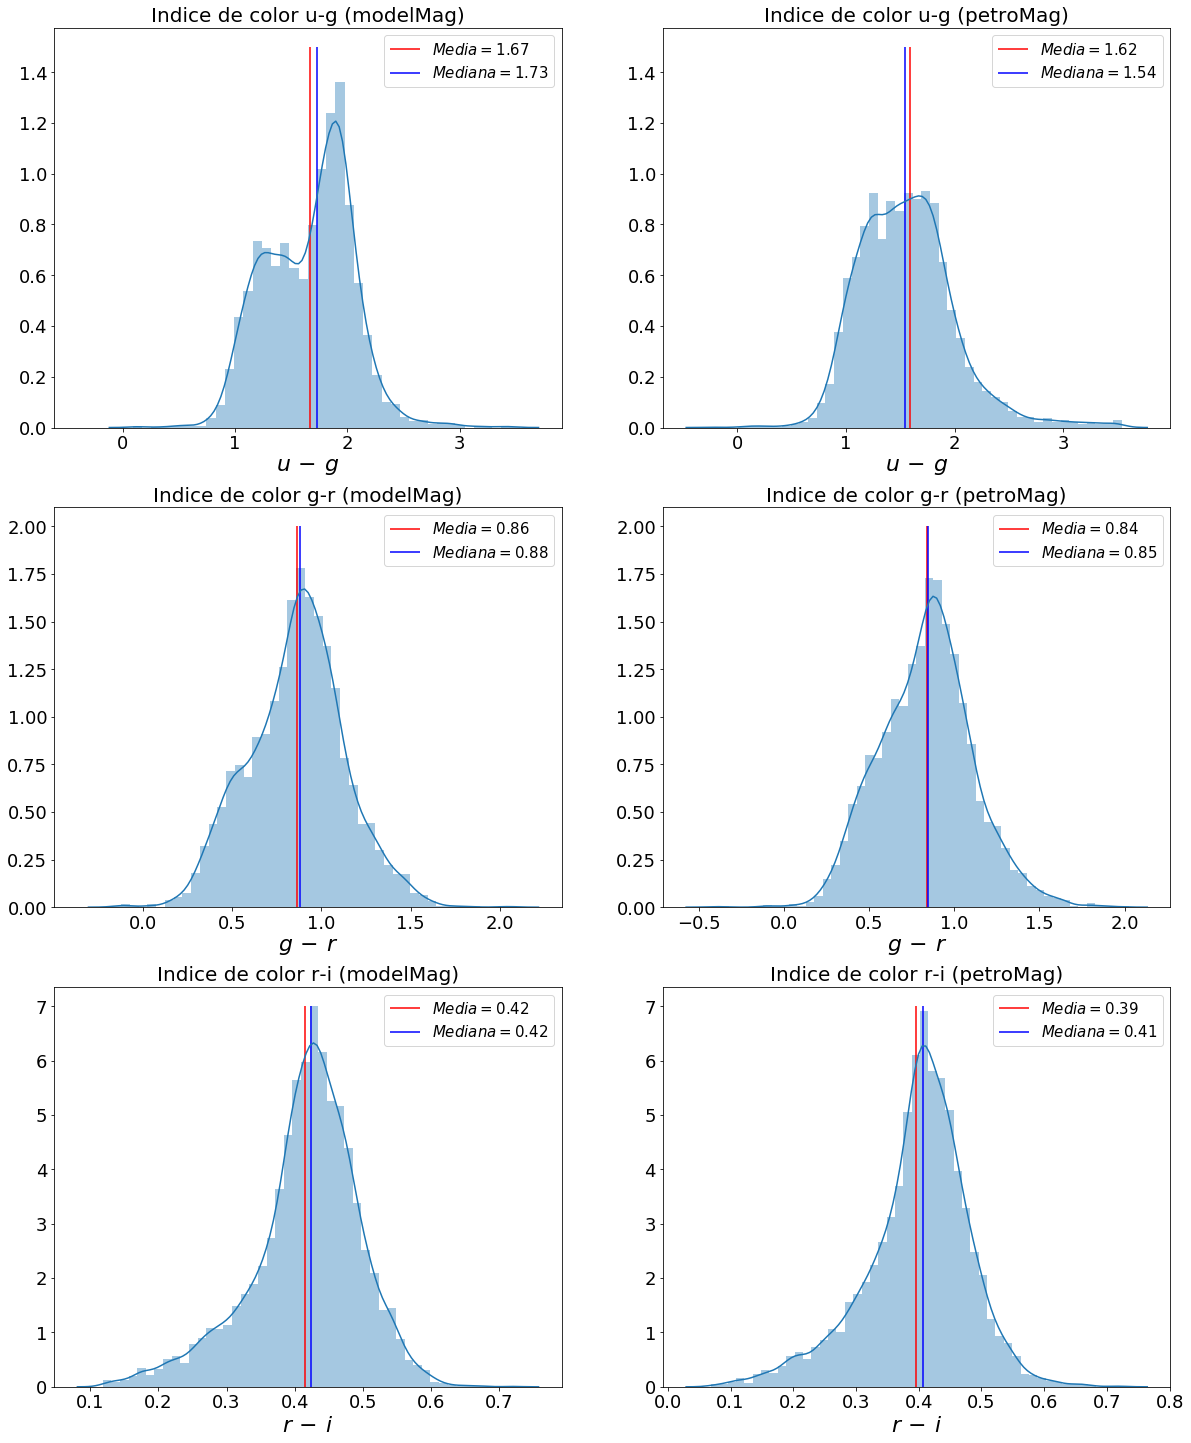

In [56]:
# para filtrar los outliers del gráfico teniendo en cuenta los cuartiles
n=3 #1.5

plt.figure(figsize=(20,25))
plt.subplot(321)

# definimos los límites inferior y superiores de los cuartiles
lowerlim=data['modelColor_ug'].quantile(0.25)
upperlim=data['modelColor_ug'].quantile(0.75)
IQ=upperlim-lowerlim
range = [lowerlim-n*IQ, upperlim+n*IQ]

seaborn.distplot(data['modelColor_ug'],kde_kws={'clip':range},hist_kws={'range':range})

var = data['modelColor_ug'].clip(0.5,upperlim+n*IQ)
plt.vlines(var.mean(),0.0,1.5,'r',label=r"$Media=$"+str(np.round(data['modelColor_ug'].mean(),2)))
plt.vlines(var.median(),0.0,1.5,'b',label=r"$Mediana=$"+str(np.round(data['modelColor_ug'].median(),2)))
plt.legend(fontsize=15)
plt.xlabel(r"$u\,-\,g$", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Indice de color u-g (modelMag)', fontsize=20)

plt.subplot(322)

# definimos los límites inferior y superiores de los cuartiles
lowerlim=data['petroColor_ug'].quantile(0.25)
upperlim=data['petroColor_ug'].quantile(0.75)
IQ=upperlim-lowerlim
range = [lowerlim-n*IQ, upperlim+n*IQ]

seaborn.distplot(data['petroColor_ug'],kde_kws={'clip':range},hist_kws={'range':range})

var = data['petroColor_ug'].clip(lowerlim-n*IQ,upperlim+n*IQ)
plt.vlines(var.mean(),0.0,1.5,'r',label=r"$Media=$"+str(np.round(data['petroColor_ug'].mean(),2)))
plt.vlines(var.median(),0.0,1.5,'b',label=r"$Mediana=$"+str(np.round(data['petroColor_ug'].median(),2)))
plt.legend(fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$u\,-\,g$", fontsize=22)
plt.title('Indice de color u-g (petroMag)', fontsize=20)

plt.subplot(323)

# definimos los límites inferior y superiores de los cuartiles
lowerlim=data['modelColor_gr'].quantile(0.25)
upperlim=data['modelColor_gr'].quantile(0.75)
IQ=upperlim-lowerlim
range = [lowerlim-n*IQ, upperlim+n*IQ]

seaborn.distplot(data['modelColor_gr'],kde_kws={'clip':range},hist_kws={'range':range})

var = data['modelColor_gr'].clip(lowerlim-n*IQ,upperlim+n*IQ)
plt.vlines(var.mean(),0.0,2.0,'r',label=r"$Media=$"+str(np.round(data['modelColor_gr'].mean(),2)))
plt.vlines(var.median(),0.0,2.0,'b',label=r"$Mediana=$"+str(np.round(data['modelColor_gr'].median(),2)))
plt.legend(fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$g\,-\,r$", fontsize=22)
plt.title('Indice de color g-r (modelMag)', fontsize=20)

plt.subplot(324)

# definimos los límites inferior y superiores de los cuartiles
lowerlim=data['petroColor_gr'].quantile(0.25)
upperlim=data['petroColor_gr'].quantile(0.75)
IQ=upperlim-lowerlim
range = [lowerlim-n*IQ, upperlim+n*IQ]

seaborn.distplot(data['petroColor_gr'],kde_kws={'clip':range},hist_kws={'range':range})

var = data['petroColor_gr'].clip(lowerlim-n*IQ,upperlim+n*IQ)
plt.vlines(var.mean(),0.0,2.0,'r',label=r"$Media=$"+str(np.round(data['petroColor_gr'].mean(),2)))
plt.vlines(var.median(),0.0,2.0,'b',label=r"$Mediana=$"+str(np.round(data['petroColor_gr'].median(),2)))
plt.legend(fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$g\,-\,r$", fontsize=22)
plt.title('Indice de color g-r (petroMag)', fontsize=20)

plt.subplot(325)

# definimos los límites inferior y superiores de los cuartiles
lowerlim=data['modelColor_ri'].quantile(0.25)
upperlim=data['modelColor_ri'].quantile(0.75)
IQ=upperlim-lowerlim
range = [lowerlim-n*IQ, upperlim+n*IQ]

seaborn.distplot(data['modelColor_ri'],kde_kws={'clip':range},hist_kws={'range':range})

var = data['modelColor_ri'].clip(lowerlim-n*IQ,upperlim+n*IQ)
plt.vlines(var.mean(),0.0,7.0,'r',label=r"$Media=$"+str(np.round(data['modelColor_ri'].mean(),2)))
plt.vlines(var.median(),0.0,7.0,'b',label=r"$Mediana=$"+str(np.round(data['modelColor_ri'].median(),2)))
plt.legend(fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$r\,-\,i$", fontsize=22)
plt.title('Indice de color r-i (modelMag)', fontsize=20)

plt.subplot(326)

# definimos los límites inferior y superiores de los cuartiles
lowerlim=data['petroColor_ri'].quantile(0.25)
upperlim=data['petroColor_ri'].quantile(0.75)
IQ=upperlim-lowerlim
range = [lowerlim-n*IQ, upperlim+n*IQ]

seaborn.distplot(data['petroColor_ri'],kde_kws={'clip':range},hist_kws={'range':range})

var = data['petroColor_ri'].clip(lowerlim-n*IQ,upperlim+n*IQ)
plt.vlines(var.mean(),0.0,7.0,'r',label=r"$Media=$"+str(np.round(data['petroColor_ri'].mean(),2)))
plt.vlines(var.median(),0.0,7.0,'b',label=r"$Mediana=$"+str(np.round(data['petroColor_ri'].median(),2)))
plt.legend(fontsize=15)
plt.xlabel(r"$r\,-\,i$", fontsize=22)
plt.title('Indice de color r-i (petroMag)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


**NOTA:**    
**a)** A partir de la comparación de las distribuciones de los colores (u-g, g-r, r-i), con magnitudes obtenidas a través de distintos metodos (model, petrosian), se puede observar que para el color u-g, en particular, las distribuciones son muy diferentes. Mientras que para las magnitudes model, la distribucion de colores (u-g) presenta una apreciable bi-modalidad, esta misma no es visible para las magnitudes petrosianas. 


## 2.8) Analice si existe alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.

In [35]:
# Separamos los datasets según el tipo morfológico
df_spiral = data[data['spiral'] == 1]
df_elliptical = data[data['elliptical'] == 1]
df_uncertain =  data[data['uncertain'] == 1]

color = ['ug','gr']

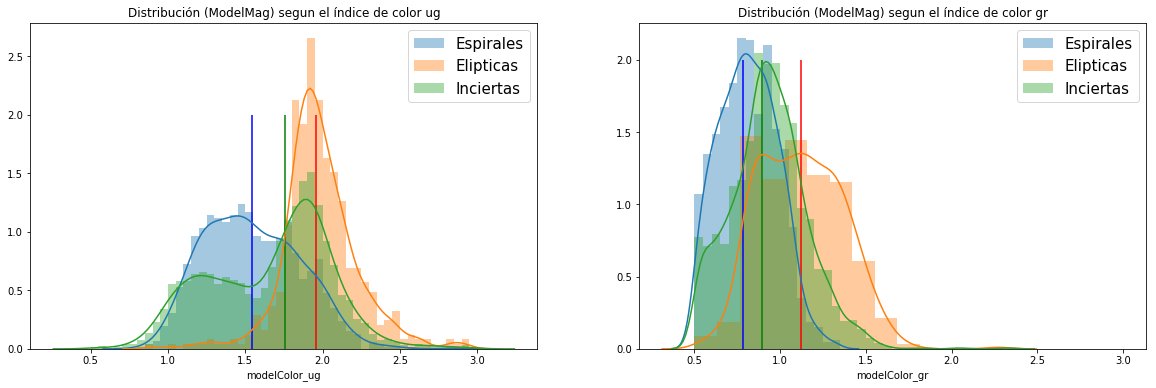

In [54]:
fig, axs = plt.subplots(1,2, figsize=(20, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)

axs = axs.ravel()
      
for i,indx in enumerate(color):
    range_plt = [0.5,3.0]
    seaborn.distplot(df_spiral['modelColor_'+color[i]],kde_kws={'clip':range_plt},hist_kws={'range':range_plt},label='Espirales', ax=axs[i])
    seaborn.distplot(df_elliptical['modelColor_'+color[i]],kde_kws={'clip':range_plt},hist_kws={'range':range_plt},label='Elipticas', ax=axs[i])
    seaborn.distplot(df_uncertain['modelColor_'+color[i]],kde_kws={'clip':range_plt},hist_kws={'range':range_plt},label='Inciertas', ax=axs[i])
    var = df_spiral['modelColor_'+color[i]].clip(0.5,3.0)
    axs[i].vlines(var.mean(),0.0,2.0,'b')
    var = df_elliptical['modelColor_'+color[i]].clip(0.5,3.0)
    axs[i].vlines(var.median(),0.0,2.0,'r')
    var = df_uncertain['modelColor_'+color[i]].clip(0.5,3.0)
    axs[i].vlines(var.median(),0.0,2.0,'g')
    axs[i].set_title('Distribución (ModelMag) segun el índice de color '+color[i])
#    axs[i].legend()
    axs[i].legend(fontsize=15)


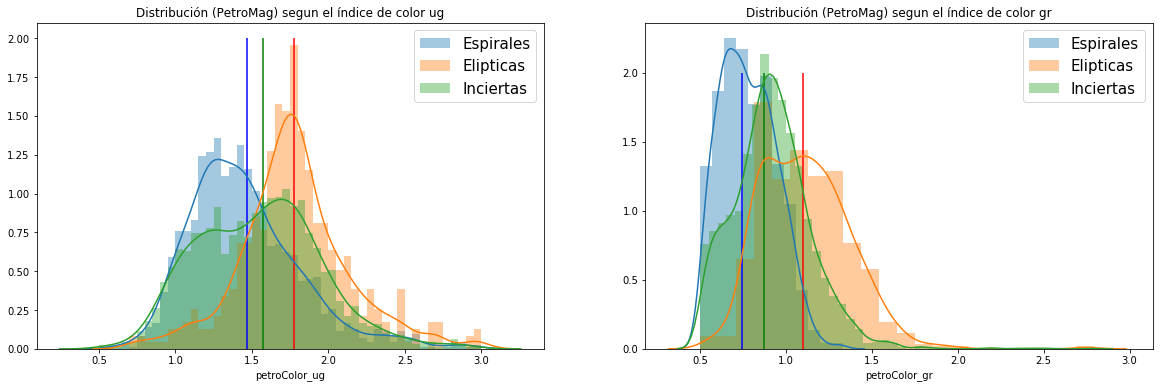

In [53]:
fig, axs = plt.subplots(1,2, figsize=(20, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)

axs = axs.ravel()
      
for i,indx in enumerate(color):
    range_plt = [0.5,3.0]
    seaborn.distplot(df_spiral['petroColor_'+color[i]],kde_kws={'clip':range_plt},hist_kws={'range':range_plt},label='Espirales', ax=axs[i])
    seaborn.distplot(df_elliptical['petroColor_'+color[i]],kde_kws={'clip':range_plt},hist_kws={'range':range_plt},label='Elipticas', ax=axs[i])
    seaborn.distplot(df_uncertain['petroColor_'+color[i]],kde_kws={'clip':range_plt},hist_kws={'range':range_plt},label='Inciertas', ax=axs[i])
    var = df_spiral['petroColor_'+color[i]].clip(0.5,3.0)
    axs[i].vlines(var.mean(),0.0,2.0,'b')
    var = df_elliptical['petroColor_'+color[i]].clip(0.5,3.0)
    axs[i].vlines(var.median(),0.0,2.0,'r')
    var = df_uncertain['petroColor_'+color[i]].clip(0.5,3.0)
    axs[i].vlines(var.median(),0.0,2.0,'g')
    axs[i].set_title('Distribución (PetroMag) segun el índice de color '+color[i])
    axs[i].legend(fontsize=15)

**NOTA:**     
**a)** Se puede observar que existe una relación entre el índice de color y el tipo morfológico. 

**b)** De la distribucion de color (u-g), discriminando por el tipo de galaxias (elipticas, espirales e irregulares), se puede observar que las galaxias elipticas tienden a estar hacia valores mayores (hacia el rojo). Sin embargo las galaxias espirales, tienden a  tomar valores menores (mas azules). Por otro lado, las galaxias irregulares se distribuyen sobre todo el rango de color.

**A continuación, analizamos la correlación de los colores (u-g, g-r, r-i), para las magnitudes model, con respecto a la morfología de las galaxias (elipticas, espirales e irregulares).**

In [38]:
Vars=['modelColor_ug','modelColor_gr','modelColor_ri','elliptical','spiral', 'uncertain']
frem=data[Vars]


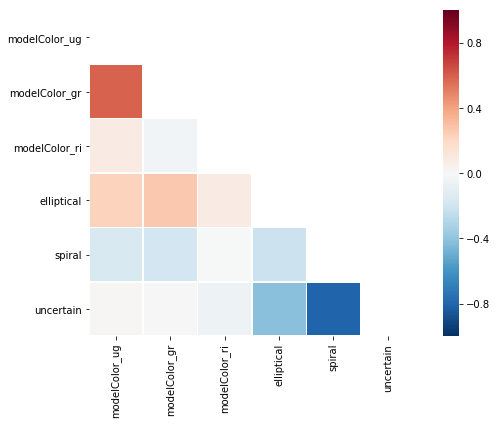

In [55]:
cor=frem.corr()
mask = np.triu(np.ones_like(cor, dtype=np.bool))

# Seteamos el tipo de figura de matplotlib 
f, ax = plt.subplots(figsize=(10, 6))

#cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

#seaborn.heatmap(cor, mask=mask, cmap=cmap, center=0,square=True, vmax=1.0,vmin=-1.0,linewidths=.5)
# Dibujamos el heatmap con la máscara creada con una paleta de color divergente
seaborn.heatmap(cor,mask=mask, cmap='RdBu_r', vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5)

**NOTA:**   
**a)** A partir del plot anterior podemos observar que los índices de colores u-g y g-r parecen tener una correlación positiva con las galaxias del tipo elipticas, y una correlación negativa con las galaxias espirales. Es decir, a medida que aumenta el color (g-r) (colores mas rojos) hay una mayor correspondencia con las galaxias del tipo elipticas. Por otro lado, cuando lo valores de (g-r) disminuye (colores más "azules") hay una mayor relación con las galaxias espirales. 

 ## 2.9) Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

* La hipótesis nula es que las 3 poblaciones de galaxias con diferente tipo morfológico tienen la misma mediana.    
* Se realiza un test de mediana con el estadístico Pearson chi cuadrado.    
* Se utilizará un nivel de significancia de 0.05.

In [40]:
from scipy.stats import median_test

stat, p, med, tbl = median_test(df_spiral['z'], df_elliptical['z'], df_uncertain['z'])

print("Mediana Total: %f"%med)
print("Tabla de contingencia:")
print(tbl)
print("P valor: %f"%p)

Mediana Total: 0.100656
Tabla de contingencia:
[[ 572  339 1589]
 [ 872  160 1468]]
P valor: 0.000000


**NOTA:**    
**a)** El p valor es menor al nivel de significancia por lo que puede rechazarse la hipótesis nula. Por ende, las galaxias de diferente tipo morfológico no tendrían la misma mediana.

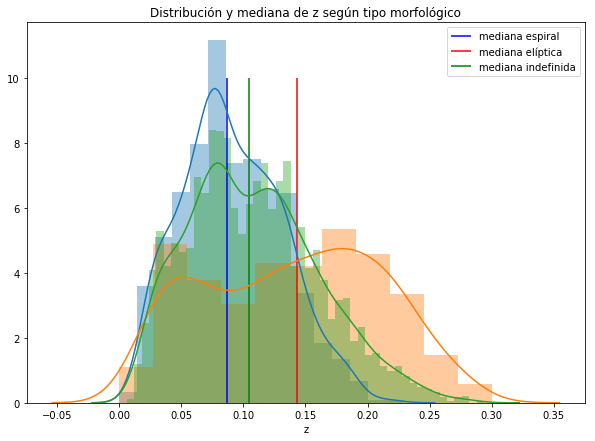

In [41]:
plt.figure(figsize=(10,7))

range_plt = [0.0,0.3]
seaborn.distplot(df_spiral['z'],kde_kws={'clip':range_plt},hist_kws={'range':range_plt})
plt.vlines(df_spiral['z'].median(),0.0,10.0,'b',label='mediana espiral')
seaborn.distplot(df_elliptical['z'],kde_kws={'clip':range_plt},hist_kws={'range':range_plt})
plt.vlines(df_elliptical['z'].median(),0.0,10.0,'r',label='mediana elíptica')
seaborn.distplot(df_uncertain['z'],kde_kws={'clip':range_plt},hist_kws={'range':range_plt})
plt.vlines(df_uncertain['z'].median(),0.0,10.0,'g',label='mediana indefinida')
plt.title('Distribución y mediana de z según tipo morfológico')
plt.legend()